In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

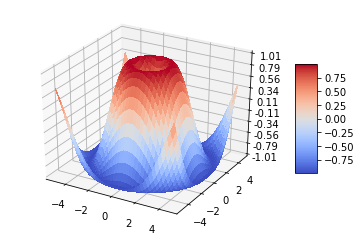

In [4]:
fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X,Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)


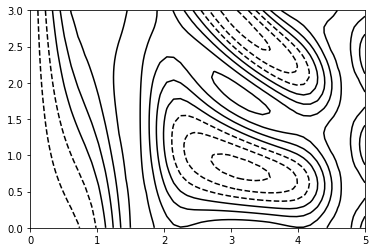

In [15]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0,5,50)
y = np.linspace(0,3,40)

X, Y = np.meshgrid(x,y)
Z = f(X,Y)

plt.contour(X,Y,Z,colors='black')

In [5]:
def h(x, param0, param1):
    return param0 + (x*param1)

def h0(x, param):
    return x*param


def cost(param0, param1, X, Y):
    sumat = 0
    
    i = 0
    while(i < len(X)):
        sumat = sumat + ((h(X[i]-Y[i],param0,param1))**2)
        i = i + 1
        
    return sumat/(2*len(X))

def act0(param0,param1, rate, X, Y):
    sumat = 0
    
    i = 0
    while(i < len(X)):
        sumat = sumat + param0 + param1*X[i] - Y[i]
        i = i +1
        
    return param0 - (sumat*rate/len(X))
    
def act1(param0, param1, rate, X, Y):
    sumat = 0
    
    i = 0
    while(i < len(X)):
        sumat = sumat + (param0 + param1*X[i]-Y[i])*X[i]
        i = i + 1
        
    return param1 - (sumat*rate/len(X))


    


1.0
1.0
-0.09501407376701906
0.8466592727041613
-0.9873926794436079
0.9363083831131316
-1.732455280514361
1.0111580029494835
-2.3545211570191333
1.073651267680037
-2.873894903809713
1.1258279940979086
-3.307529184427928
1.1693912611383397
-3.669578075980963
1.2057629993734518
-3.971859066514981
1.2361304036596301
-4.224238784752134
1.2614846838735456
-4.434955052635662
1.2826534185835556
-4.6108857726669745
1.3003275676992876
-4.7577734266749925
1.3150840258081138
-4.880412513789162
1.3274044523526494
-4.982806045701494
1.337690993277298


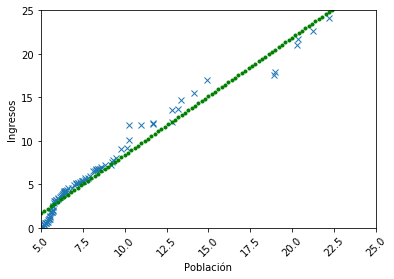

In [8]:
import csv

X = []
Y = []

with open("ex1data1.csv") as file:
    csvr = csv.reader(file, delimiter=',')
    
    i = 0
    for linea in csvr:
        
        X.append(float(linea[0]))
        Y.append(float(linea[1]))
        
        i = i + 1
        
    X.sort()
    Y.sort()
    plt.plot(X, Y, "x")
    
    ax = plt.gca()
    x  = ax.xaxis
    
    plt.axis([5, 25, 0, 25])
    plt.xlabel("Población")
    plt.ylabel("Ingresos")
    
    for item in x.get_ticklabels():
        item.set_rotation(45)
        
    entrenamiento(X, Y)

In [7]:
def entrenamiento(X, Y):
    i = 0
    M = 1500
    alfa = 0.01
    #PARAMETROS DE LA FUNCION HIPOTESIS
    param0 = 1.0
    param1 = 1.0
    
    c = 0.0
    min_cost = float(cost(param0, param1, X, Y))
    
    while(i < M): 
        c = float(cost(param0, param1, X, Y)) 
                                              
        if(c < min_cost): #SI EL COSTE SE REDUCE SE GUARDA COMO EL MINIMO
            min_cost = c
        
        #ACTUALIZAMOS PARAMETROS
        sum0 = 1.0/len(X) * np.sum([param0 + param1*X[i] - Y[i] for i in range(len(X))])
        sum1 = 1.0/len(X) * np.sum([(param0 + param1*X[i] - Y[i])*X[i] for i in range(len(X))])
        
        aux0 = param0
        aux1 = param1
        
        param0 = aux0 - alfa * sum0
        param1 = aux1 - alfa * sum1
        
        i = i + 1
        
    
    Z = np.arange(-25, 25, 0.2)
    
    for hx in Z:
        hy = param0 + param1*hx
        plt.plot(hx,hy,"g.")
        

In [8]:
def normalize(X):
    
    ac_metros = []
    ac_precio = []
    ac_ciudad = []
    
    for i in len(X):
        ac_metros[i] = double(X[i][0])
        ac_ciudad[i] = double(row[i][1])
        ac_precio[i] = double(row[i][2])
        
    m_metros = np.mean(ac_metros)
    std_metros = np.std(ac_metros)
    
    m_ciudad = np.mean(ac_ciudad)
    std_ciudad = np.std(ac_ciudad)
    
    m_precio = np.mean(ac_precio)
    std_precio = np.std(ac_precio)
    
    for row in X:
        row[0] = (row[0] - m_metros)/std_metros
        row[1] = (row[1] - m_ciudad)/std_ciudad
        row[2] = (row[2] - m_precio)/std_precio
        
    return [X,[m_metros, m_ciudad, m_precio], [std_metros, std_ciudad, std_precio]]
    
        